In [52]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [78]:
df=pd.read_csv('Results_KL.csv')
df

,id,age,city_index,bloodgroup,rtime,kap_score,hosp_name,hosp_type,pra,avg,...,total patients on waitlist,total A patients,total B patients,total O patients,total AB patients,pra type,status,5th year status,2nd year status,1st year status
0,105128,38,5,1,25982,7.5,0,1,28,0,...,4731,949,1640,1826,316,2,N,NaN,NaN,NaN
1,105139,53,0,1,27269,4.5,19,1,46,0,...,4729,949,1639,1825,316,2,N,NaN,NaN,NaN
2,105152,54,3,0,31275,15.0,6,1,0,0,...,4727,949,1637,1825,316,4,N,NaN,NaN,NaN
3,105166,52,18,1,37096,17.0,2,0,0,0,...,4724,948,1636,1824,316,4,N,NaN,NaN,NaN
4,105170,37,28,2,36758,14.0,1,1,96,0,...,4725,948,1637,1824,316,3,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27633,262793,66,0,2,29532,8.5,2,1,44,0,...,4621,979,1517,1812,313,2,NaN,NaN,NaN,NaN
27634,262794,49,19,0,34769,13.0,0,1,0,0,...,4622,979,1517,1813,313,4,NaN,NaN,NaN,NaN
27635,262795,51,13,1,41075,14.0,1,1,0,0,...,4623,980,1517,1813,313,4,NaN,NaN,NaN,NaN
27636,262797,50,24,0,24222,4.0,0,1,0,0,...,4623,980,1516,1814,313,4,NaN,NaN,NaN,NaN


In [79]:
df=df.drop(['Time to allocation','id','rtime'],axis=1)
df.dropna(subset = ["status"], inplace=True)
df = df.replace({'status': {'Y': 1, 'N': 0},'1st year status': {'Y': 1, np.nan: 0},'2nd year status': {'Y': 1, np.nan: 0},'5th year status': {'Y': 1, np.nan: 0}})

df

,age,city_index,bloodgroup,kap_score,hosp_name,hosp_type,pra,avg,av_fitsula,time_on_dailysis,...,total patients on waitlist,total A patients,total B patients,total O patients,total AB patients,pra type,status,5th year status,2nd year status,1st year status
0,38,5,1,7.5,0,1,28,0,0,7,...,4731,949,1640,1826,316,2,0,0.0,0.0,0.0
1,53,0,1,4.5,19,1,46,0,0,3,...,4729,949,1639,1825,316,2,0,0.0,0.0,0.0
2,54,3,0,15.0,6,1,0,0,0,15,...,4727,949,1637,1825,316,4,0,0.0,0.0,0.0
3,52,18,1,17.0,2,0,0,0,0,17,...,4724,948,1636,1824,316,4,0,0.0,0.0,0.0
4,37,28,2,14.0,1,1,96,0,0,10,...,4725,948,1637,1824,316,3,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27222,42,2,0,1.0,5,0,0,0,0,1,...,4634,984,1524,1802,324,4,0,0.0,0.0,0.0
27245,47,24,1,1.0,0,1,0,0,0,1,...,4633,981,1520,1809,323,4,0,0.0,0.0,0.0
27251,59,1,0,1.0,5,1,0,0,0,1,...,4628,979,1516,1808,325,4,0,0.0,0.0,0.0
27276,48,15,0,1.0,0,1,0,0,0,1,...,4628,977,1521,1810,320,4,0,0.0,0.0,0.0


In [4]:
# feature_names =df.drop(df.iloc[:, 25:29], axis = 1).columns
# X = df[feature_names]
# y = df['status']
# y2=df['2nd year status']
# y5=df['5th year status']
# X

23017

In [6]:
def preprocessing(X,y,random_state):    
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return [X_train,X_test,y_train,y_test]

In [7]:

def evaluate_hyperparam(X_train,y_train,grid, model):    
    grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring='roc_auc',verbose=0)
    grid_result = grid_search.fit(X_train,y_train)
    print('Best parameters: {}'.format(grid_search.best_params_))
#     if(flag==1):
#         means = grid_result.cv_results_['mean_test_score']
#         stds = grid_result.cv_results_['std_test_score']
#         params = grid_result.cv_results_['params']
#         for mean, stdev, param in zip(means, stds, params):
#             print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_search.best_params_

In [29]:
def evaluate_model(X_train,X_test,y_train,y_test, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    scores = cross_val_score(model, X_train, y_train, cv=3, scoring="roc_auc")
    diff = scores.mean() - model.score(X_test, y_test)
    report= classification_report(y_test, preds,output_dict=True)
#     print(f"Training Score: {model.score(X_train, y_train)}")
#     print(f"Cross V Score: {scores.mean()} +/- {scores.std()}")
#     print(f"Testing Score: {model.score(X_test, y_test)}")
#     print(f"Cross & Test Diff: {diff}")
#     print(f"Standard Deviations Away: {SD}")
    auc_score.append(roc_auc_score(y_test,preds))
    precision[0].append(report['0']['precision'])
    recall[0].append(report['0']['recall'])
    f1[0].append(report['0']['f1-score'])
    precision[1].append(report['1']['precision'])
    recall[1].append(report['1']['recall'])
    f1[1].append(report['1']['f1-score'])

In [9]:
def balancing(X_train,X_test,y_train,y_test,model):
    smt = SMOTE(random_state=1)
    pipeline = make_pipeline(smt, model)
    return pipeline

In [10]:
logreg = LogisticRegression(random_state=1)
def logr(X_train,X_test,y_train,y_test):
    hyperparams={'C': 500, 'penalty': 'l2', 'solver': 'newton-cg'}
    # print("LOGISTIC REGRESSION:")
    # logreg = LogisticRegression(random_state=1)
    # grid = dict(solver=['newton-cg', 'liblinear'],penalty= ['l2'],C=[500, 200, 100, 10, 1.0, 0.1, 0.01,0.001])
    # hyperparams=evaluate_hyperparam(X_train,y_train,grid,logreg)

#     print("Without balancing:")
#     evaluate_model(X_train,X_test,y_train,y_test,logreg)

#     print("With SMOTE balancing:")
    logreg=LogisticRegression(**hyperparams,random_state=1)
    evaluate_model(X_train,X_test,y_train,y_test, balancing(X_train,X_test,y_train,y_test,logreg))

In [11]:
# from sklearn.linear_model import RidgeClassifier
# print("RIDGE CLASSIFIER:")
# ridge = RidgeClassifier(random_state=1)
# grid = dict(alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
# hyperparams=evaluate_hyperparam(grid,ridge)
# ridge=RidgeClassifier(**hyperparams,random_state=1)

# print("Without balancing:")
# evaluate_model(ridge)

# print("With SMOTE balancing (random_state=1):")
# evaluate_model(balancing(ridge))

In [12]:
# from sklearn.neighbors import KNeighborsClassifier

In [13]:
# def knn(X_train,X_test,y_train,y_test):
#     print("KNN (sklearn function doesn't include random_state)")
#     knn = KNeighborsClassifier()
#     grid = dict(n_neighbors = range(1, 21, 2), weights = ['uniform', 'distance'], metric = ['euclidean', 'manhattan', 'minkowski'])
#     hyperparams=evaluate_hyperparam(grid,knn)
#     knn=KNeighborsClassifier(**hyperparams)

# #     print("Without balancing:")
# #     evaluate_model(knn)

# #     print("With SMOTE balancing (random_state=1):")
#     evaluate_model(balancing(knn))

In [14]:
from sklearn.svm import SVC
svc = SVC(random_state=1)
def svm(X_train,X_test,y_train,y_test):
    hyperparams= {'C': 1, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}
    # print("SVM Classifier")
    # svm = SVC(random_state=1)
    # grid = dict(kernel = ['poly', 'rbf'], C = [200,100,10,1], gamma = ['scale'], degree=[1])
    # hyperparams=evaluate_hyperparam(X_train,y_train,grid,svm)
    
    

#     print("Without balancing:")
#     evaluate_model(X_train,X_test,y_train,y_test,svm)

#     print("With SMOTE balancing (random_state=1):")
    svm=SVC(**hyperparams,random_state=1)
    evaluate_model(X_train,X_test,y_train,y_test,balancing(X_train,X_test,y_train,y_test,svm))

In [15]:
from sklearn.ensemble import BaggingClassifier

In [16]:
bag=BaggingClassifier(random_state=1)
def bagging(X_train,X_test,y_train,y_test):
    hyperparams={'n_estimators':1000}
    # print("Bagging Classifier (Ensemble Decision Trees):")
    # bag=BaggingClassifier(random_state=1)
    # grid = dict(n_estimators = [10, 100, 200,500,1000])
    # hyperparams=evaluate_hyperparam(X_train,y_train,grid,bag)
    
    bag=BaggingClassifier(**hyperparams,random_state=1)

#     print("Without balancing:")
#     evaluate_model(X_train,X_test,y_train,y_test,bag)

#     print("With SMOTE balancing (random_state=1):")
    evaluate_model(X_train,X_test,y_train,y_test,balancing(X_train,X_test,y_train,y_test,bag))

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=1)
def rforest(X_train,X_test,y_train,y_test):
    hyperparams={'max_features': 'sqrt', 'n_estimators': 500}
    # print("Random Forest Classifier (Ensemble Decision Trees):")
    # forest=RandomForestClassifier(random_state=1)
    # grid = dict(n_estimators = [10, 20, 100,200,500], max_features = ['sqrt', 'log2'])
    # hyperparams=evaluate_hyperparam(X_train,y_train,grid,forest)
    
    forest=RandomForestClassifier(**hyperparams,random_state=1)

#     print("Without balancing:")
#     evaluate_model(X_train,X_test,y_train,y_test,forest)

#     print("With SMOTE balancing (random_state=1):")
    evaluate_model(X_train,X_test,y_train,y_test,balancing(X_train,X_test,y_train,y_test,forest))

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=1)
def gradientboost(X_train,X_test,y_train,y_test):
    hyperparams={'learning_rate': 0.1, 'n_estimators': 100}
    # print("Gradient Boosting Classifier")
    # gbc= GradientBoostingClassifier(random_state=1)
    # grid = dict(learning_rate = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], n_estimators=[10,20,50,100])
    # hyperparams=evaluate_hyperparam(X_train,y_train,grid,gbc)
    
    gbc=GradientBoostingClassifier(**hyperparams,random_state=1)
    
#     print("Without balancing:")
#     evaluate_model(X_train,X_test,y_train,y_test,gbc)

#     print("With SMOTE balancing (random_state=1):")
    evaluate_model(X_train,X_test,y_train,y_test,balancing(X_train,X_test,y_train,y_test,gbc))



In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [19]:
def make_classification_ann(Optimizer_Trial='adam', Neurons_Trial=30):
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=23, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

In [ ]:
NN=KerasClassifier(make_classification_ann('adam',30), verbose=0)
def ann(X_train,X_test,y_train,y_test):
    Parameter_Trials={'batch_size':[10],
                        'epochs':[20],
                        'Optimizer_Trial':['adam'],
                      'Neurons_Trial': [10,20,25,30]
                     }
    hyperparams= {'Neurons_Trial': 30, 'Optimizer_Trial': 'adam', 'batch_size': 10, 'epochs': 20}
#     NN=KerasClassifier(make_classification_ann, verbose=0)
#     print("Neural Networks (2 hidden layers, equal hidden neurons):")
#     hyperparams=evaluate_hyperparam(X_train,y_train,Parameter_Trials,NN)
    
    NN=KerasClassifier(make_classification_ann,**hyperparams,verbose=0)
#     print("Without Balancing:")
#     evaluate_model(X_train,X_test,y_train,y_test,NN)
    

#     print("With SMOTE Balancing (random_state=1):")
    evaluate_model(X_train,X_test,y_train,y_test,balancing(X_train,X_test,y_train,y_test,NN))

In [24]:
def status():
    X=df.drop(df.iloc[:, 23:27], axis = 1)
    #X=df[['bloodgroup', 'city_index', 'kap_score']]
    y=df['status']
    #n=X.size
    X_train, X_test, y_train, y_test=preprocessing(X,y,1)
    logr(X_train,X_test,y_train,y_test)
    print("---------------------------------------------------------------------")
    svm(X_train,X_test,y_train,y_test)
    print("---------------------------------------------------------------------")
    bagging(X_train,X_test,y_train,y_test)
    print("---------------------------------------------------------------------")
    rforest(X_train,X_test,y_train,y_test)
    print("---------------------------------------------------------------------")
    gradientboost(X_train,X_test,y_train,y_test)
    print("---------------------------------------------------------------------")
    ann(X_train,X_test,y_train,y_test)

In [37]:
status()

---------------------------------------------------------------------
Random Forest Classifier (Ensemble Decision Trees):
Best parameters: {'max_features': 'sqrt', 'n_estimators': 500}
---------------------------------------------------------------------
Gradient Boosting Classifier
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [ ]:
# def year5status():
#     X=df.drop(df.iloc[:, 25:29], axis = 1)
#     #X=df[['bloodgroup', 'city_index', 'kap_score']]
#     y=df['5th year status']
#     #n=X.size
#     X_train, X_test, y_train, y_test=preprocessing(X,y,1)
#     logr(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     svm(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     bagging(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     rforest(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     gradientboost(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     ann(X_train,X_test,y_train,y_test)
# year5status()
# def year2status():
#     X=df.drop(df.iloc[:, 25:29], axis = 1)
#     #X=df[['bloodgroup', 'city_index', 'kap_score']]
#     y=df['2nd year status']
#     #n=X.size
#     X_train, X_test, y_train, y_test=preprocessing(X,y,1)
#     logr(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     svm(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     bagging(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     rforest(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     gradientboost(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     ann(X_train,X_test,y_train,y_test)
# year2status()
# def year1status():
#     X=df.drop(df.iloc[:, 25:29], axis = 1)
#     #X=df[['bloodgroup', 'city_index', 'kap_score']]
#     y=df['1st year status']
#     #n=X.size
#     X_train, X_test, y_train, y_test=preprocessing(X,y,1)
#     print("---------------------------------------------------------------------")
#     svm(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     bagging(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     rforest(X_train,X_test,y_train,y_test)
#     print("---------------------------------------------------------------------")
#     ann(X_train,X_test,y_train,y_test)
# year1status()

In [ ]:
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=25, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

In [ ]:
def bloodgroups():
    for i in range(4):
        df1=df[df['bloodgroup']==i].drop(['bloodgroup'],axis=1)
        feature_names =df1.drop(df1.iloc[:, 24:29], axis = 1).columns
        X = df1[feature_names]
        for y in [df1['status'],df1['5th year status']]:
            X_train,X_test,y_train,y_test=preprocessing(X,y,1)
            print("######################################################################")
            print("Blood Group:",i)
            print("Target:",y.name)
            print("Train/Test split:",X_train.size/X_test.size)
            print("---------------------------------")
            logr(X_train,X_test,y_train,y_test)
            print("---------------------------------------------------------------------")
            svm(X_train,X_test,y_train,y_test)
            print("---------------------------------------------------------------------")
            bagging(X_train,X_test,y_train,y_test)
            print("---------------------------------------------------------------------")
            rforest(X_train,X_test,y_train,y_test)
            print("---------------------------------------------------------------------")
            ann(X_train,X_test,y_train,y_test)
            print("---------------------------------------------------------------------")
            gradientboost(X_train,X_test,y_train,y_test)
        
        

    

In [25]:
auc_score=[]
precision=[[],[]]
recall=[[],[]]
f1=[[],[]]
def replications(model):
    global auc_score
    global precision
    global recall
    global f1
    auc_score=[]
    precision=[[],[]]
    recall=[[],[]]
    f1=[[],[]]
    feature_names =df.drop(df.iloc[:, 16:27], axis = 1).columns
    X = df[feature_names]
    y=df['status']
    for i in range(1,11):
        #print("Random state:",10*i)
        X_train,X_test,y_train,y_test=preprocessing(X,y,i*10)
        model(X_train,X_test,y_train,y_test)

    print(f"{np.around(mean(auc_score),decimals=2)} ({np.around(pstdev(auc_score),decimals=3)})")
    print(f"{np.around(mean(precision[0]),decimals=2)} ({np.around(pstdev(precision[0]),decimals=3)})")
    print(f"{np.around(mean(recall[0]),decimals=2)} ({np.around(pstdev(recall[0]),decimals=3)})")
    print(f"{np.around(mean(f1[0]),decimals=2)} ({np.around(pstdev(f1[0]),decimals=3)})")
    print(f"{np.around(mean(precision[1]),decimals=2)} ({np.around(pstdev(precision[1]),decimals=3)})")
    print(f"{np.around(mean(recall[1]),decimals=2)} ({np.around(pstdev(recall[1]),decimals=3)})")
    print(f"{np.around(mean(f1[1]),decimals=2)} ({np.around(pstdev(f1[1]),decimals=3)})")

In [61]:
print("Logistic Regression:")
replications(logr)
print("######################################################################")
print("SVM Regressor:")
replications(svm)
print("######################################################################")
print("Bagging DT:")
replications(bagging)
print("######################################################################")
print("Random Forest DT:")
replications(rforest)
print("######################################################################")
# print("ANN:")
# replications(ann)
# print("######################################################################")
print("Gradient Boost:")
replications(gradientboost)

Logistic Regression:
0.92 (0.004)
0.98 (0.002)
0.92 (0.004)
0.95 (0.002)
0.7 (0.007)
0.93 (0.011)
0.8 (0.005)
######################################################################
SVM Regressor:
0.92 (0.004)
0.98 (0.002)
0.92 (0.003)
0.95 (0.002)
0.7 (0.007)
0.93 (0.009)
0.8 (0.006)
######################################################################
Bagging DT:
0.9 (0.006)
0.97 (0.003)
0.96 (0.003)
0.96 (0.001)
0.8 (0.01)
0.85 (0.013)
0.82 (0.005)
######################################################################
Random Forest DT:
0.91 (0.004)
0.97 (0.002)
0.95 (0.003)
0.96 (0.002)
0.78 (0.01)
0.88 (0.01)
0.83 (0.006)
######################################################################
Gradient Boost:
0.93 (0.004)
0.98 (0.002)
0.94 (0.004)
0.96 (0.002)
0.75 (0.01)
0.91 (0.01)
0.82 (0.007)


In [72]:
from statistics import pstdev
from statistics import mean
auc_score=[]
precision=[[],[]]
recall=[[],[]]
f1=[[],[]]
def replications5(model):
    global auc_score
    global precision
    global recall
    global f1
    auc_score=[]
    precision=[[],[]]
    recall=[[],[]]
    f1=[[],[]]
    feature_names =df.drop(df.iloc[:, 16:27], axis = 1).columns
    X = df[feature_names]
    y=df['5th year status']
    for i in range(1,11):
        #print("Random state:",10*i)
        X_train,X_test,y_train,y_test=preprocessing(X,y,i*10)
        model(X_train,X_test,y_train,y_test)

    print(f"{np.around(mean(auc_score),decimals=2)} ({np.around(pstdev(auc_score),decimals=3)})")
    print(f"{np.around(mean(precision[0]),decimals=2)} ({np.around(pstdev(precision[0]),decimals=3)})")
    print(f"{np.around(mean(recall[0]),decimals=2)} ({np.around(pstdev(recall[0]),decimals=3)})")
    print(f"{np.around(mean(f1[0]),decimals=2)} ({np.around(pstdev(f1[0]),decimals=3)})")
    print(f"{np.around(mean(precision[1]),decimals=2)} ({np.around(pstdev(precision[1]),decimals=3)})")
    print(f"{np.around(mean(recall[1]),decimals=2)} ({np.around(pstdev(recall[1]),decimals=3)})")
    print(f"{np.around(mean(f1[1]),decimals=2)} ({np.around(pstdev(f1[1]),decimals=3)})")

In [73]:
print("Logistic Regression:")
replications5(logr)
print("######################################################################")
print("SVM Regressor:")
replications5(svm)
print("######################################################################")
print("Bagging DT:")
replications5(bagging)
print("######################################################################")
print("Random Forest DT:")
replications5(rforest)
print("######################################################################")
print("ANN:")
replications5(ann)
print("######################################################################")
print("Gradient Boost:")
replications5(gradientboost)

Logistic Regression:


KeyError: '0'

In [ ]:
auc_score=[]
precision=[[],[]]
recall=[[],[]]
f1=[[],[]]
def replications2(model):
    global auc_score
    global precision
    global recall
    global f1
    auc_score=[]
    precision=[[],[]]
    recall=[[],[]]
    f1=[[],[]]
    feature_names =df.drop(df.iloc[:, 23:27], axis = 1).columns
    X = df[feature_names]
    y=df['2nd year status']
    for i in range(1,11):
        #print("Random state:",10*i)
        X_train,X_test,y_train,y_test=preprocessing(X,y,i*10)
        model(X_train,X_test,y_train,y_test)

    print(f"{np.around(mean(auc_score),decimals=2)} ({np.around(pstdev(auc_score),decimals=3)})")
    print(f"{np.around(mean(precision[0]),decimals=2)} ({np.around(pstdev(precision[0]),decimals=3)})")
    print(f"{np.around(mean(recall[0]),decimals=2)} ({np.around(pstdev(recall[0]),decimals=3)})")
    print(f"{np.around(mean(f1[0]),decimals=2)} ({np.around(pstdev(f1[0]),decimals=3)})")
    print(f"{np.around(mean(precision[1]),decimals=2)} ({np.around(pstdev(precision[1]),decimals=3)})")
    print(f"{np.around(mean(recall[1]),decimals=2)} ({np.around(pstdev(recall[1]),decimals=3)})")
    print(f"{np.around(mean(f1[1]),decimals=2)} ({np.around(pstdev(f1[1]),decimals=3)})")

In [ ]:
print("Logistic Regression:")
replications2(logr)
print("######################################################################")
print("SVM Regressor:")
replications2(svm)
print("######################################################################")
print("Bagging DT:")
replications2(bagging)
print("######################################################################")
print("Random Forest DT:")
replications2(rforest)
print("######################################################################")
print("ANN:")
replications2(ann)
print("######################################################################")
print("Gradient Boost:")
replications2(gradientboost)

In [ ]:
auc_score=[]
precision=[[],[]]
recall=[[],[]]
f1=[[],[]]
def replications1(model):
    global auc_score
    global precision
    global recall
    global f1
    auc_score=[]
    precision=[[],[]]
    recall=[[],[]]
    f1=[[],[]]
    feature_names =df.drop(df.iloc[:, 23:27], axis = 1).columns
    X = df[feature_names]
    y=df['1st year status']
    for i in range(1,11):
        #print("Random state:",10*i)
        X_train,X_test,y_train,y_test=preprocessing(X,y,i*10)
        model(X_train,X_test,y_train,y_test)

    print(f"{np.around(mean(auc_score),decimals=2)} ({np.around(pstdev(auc_score),decimals=3)})")
    print(f"{np.around(mean(precision[0]),decimals=2)} ({np.around(pstdev(precision[0]),decimals=3)})")
    print(f"{np.around(mean(recall[0]),decimals=2)} ({np.around(pstdev(recall[0]),decimals=3)})")
    print(f"{np.around(mean(f1[0]),decimals=2)} ({np.around(pstdev(f1[0]),decimals=3)})")
    print(f"{np.around(mean(precision[1]),decimals=2)} ({np.around(pstdev(precision[1]),decimals=3)})")
    print(f"{np.around(mean(recall[1]),decimals=2)} ({np.around(pstdev(recall[1]),decimals=3)})")
    print(f"{np.around(mean(f1[1]),decimals=2)} ({np.around(pstdev(f1[1]),decimals=3)})")

In [ ]:
print("Logistic Regression:")
replications1(logr)
print("######################################################################")
print("SVM Regressor:")
replications1(svm)
print("######################################################################")
print("Bagging DT:")
replications1(bagging)
print("######################################################################")
print("Random Forest DT:")
replications1(rforest)
print("######################################################################")
print("ANN:")
replications1(ann)
print("######################################################################")
print("Gradient Boost:")
replications1(gradientboost)

In [ ]:
def make_classification_ann(Optimizer_Trial, Neurons_Trial):
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=22, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation='relu'))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

In [103]:
auc_score=[]
precision=[[],[]]
recall=[[],[]]
f1=[[],[]]
def replicationsbg(model):
    global auc_score
    global precision
    global recall
    global f1
    for i in range(4):
        auc_score=[]
        precision=[[],[]]
        recall=[[],[]]
        f1=[[],[]]
        df1=df[df['bloodgroup']==i].drop(['bloodgroup'],axis=1)
        feature_names =df1.drop(df1.iloc[:, 22:27], axis = 1).columns
        X = df1[feature_names]
        for y in [df1['status']]:
            for j in range(1,11):
                #print("Random state:",10*i)
                X_train,X_test,y_train,y_test=preprocessing(X,y,j*10)
                model(X_train,X_test,y_train,y_test)
            # print("######################################################################")
            # print("Blood Group:",i)
            # print("Target:",y.name)

            print(f"{np.around(mean(auc_score),decimals=2)} ({np.around(pstdev(auc_score),decimals=3)})")
            print(f"{np.around(mean(precision[0]),decimals=2)} ({np.around(pstdev(precision[0]),decimals=3)})")
            print(f"{np.around(mean(recall[0]),decimals=2)} ({np.around(pstdev(recall[0]),decimals=3)})")
            print(f"{np.around(mean(f1[0]),decimals=2)} ({np.around(pstdev(f1[0]),decimals=3)})")
            print(f"{np.around(mean(precision[1]),decimals=2)} ({np.around(pstdev(precision[1]),decimals=3)})")
            print(f"{np.around(mean(recall[1]),decimals=2)} ({np.around(pstdev(recall[1]),decimals=3)})")
            print(f"{np.around(mean(f1[1]),decimals=2)} ({np.around(pstdev(f1[1]),decimals=3)})")

In [104]:
# print("Logistic Regression:")
# replicationsbg(logr)
# print("######################################################################")
# print("SVM Regressor:")
# replicationsbg(svm)
# print("######################################################################")
print("Bagging DT:")
replicationsbg(bagging)
print("Random Forest DT:")
replicationsbg(rforest)
# print("######################################################################")
# print("ANN:")
# replicationsbg(ann)
print("Gradient Boost:")
replicationsbg(gradientboost)

Bagging DT:
0.92 (0.008)
0.98 (0.003)
0.96 (0.005)
0.97 (0.003)
0.79 (0.021)
0.87 (0.015)
0.83 (0.014)
0.91 (0.009)
0.97 (0.005)
0.94 (0.01)
0.96 (0.004)
0.77 (0.031)
0.87 (0.023)
0.82 (0.015)
0.92 (0.008)
0.97 (0.002)
0.96 (0.004)
0.96 (0.003)
0.8 (0.019)
0.88 (0.014)
0.84 (0.016)
0.88 (0.02)
0.95 (0.009)
0.92 (0.013)
0.93 (0.009)
0.76 (0.037)
0.84 (0.034)
0.8 (0.031)
Random Forest DT:
0.92 (0.009)
0.98 (0.003)
0.95 (0.005)
0.97 (0.003)
0.77 (0.019)
0.9 (0.015)
0.83 (0.015)
0.91 (0.008)
0.97 (0.004)
0.94 (0.01)
0.96 (0.004)
0.76 (0.027)
0.89 (0.023)
0.82 (0.014)
0.93 (0.008)
0.98 (0.003)
0.95 (0.003)
0.96 (0.003)
0.79 (0.012)
0.91 (0.014)
0.84 (0.012)
0.88 (0.018)
0.95 (0.009)
0.92 (0.014)
0.94 (0.009)
0.76 (0.039)
0.84 (0.031)
0.8 (0.03)
Gradient Boost:
0.93 (0.006)
0.98 (0.002)
0.95 (0.005)
0.97 (0.003)
0.76 (0.019)
0.91 (0.011)
0.83 (0.013)
0.92 (0.009)
0.98 (0.004)
0.94 (0.008)
0.96 (0.004)
0.76 (0.027)
0.9 (0.021)
0.82 (0.018)
0.93 (0.008)
0.98 (0.003)
0.95 (0.004)
0.96 (0.003)
0

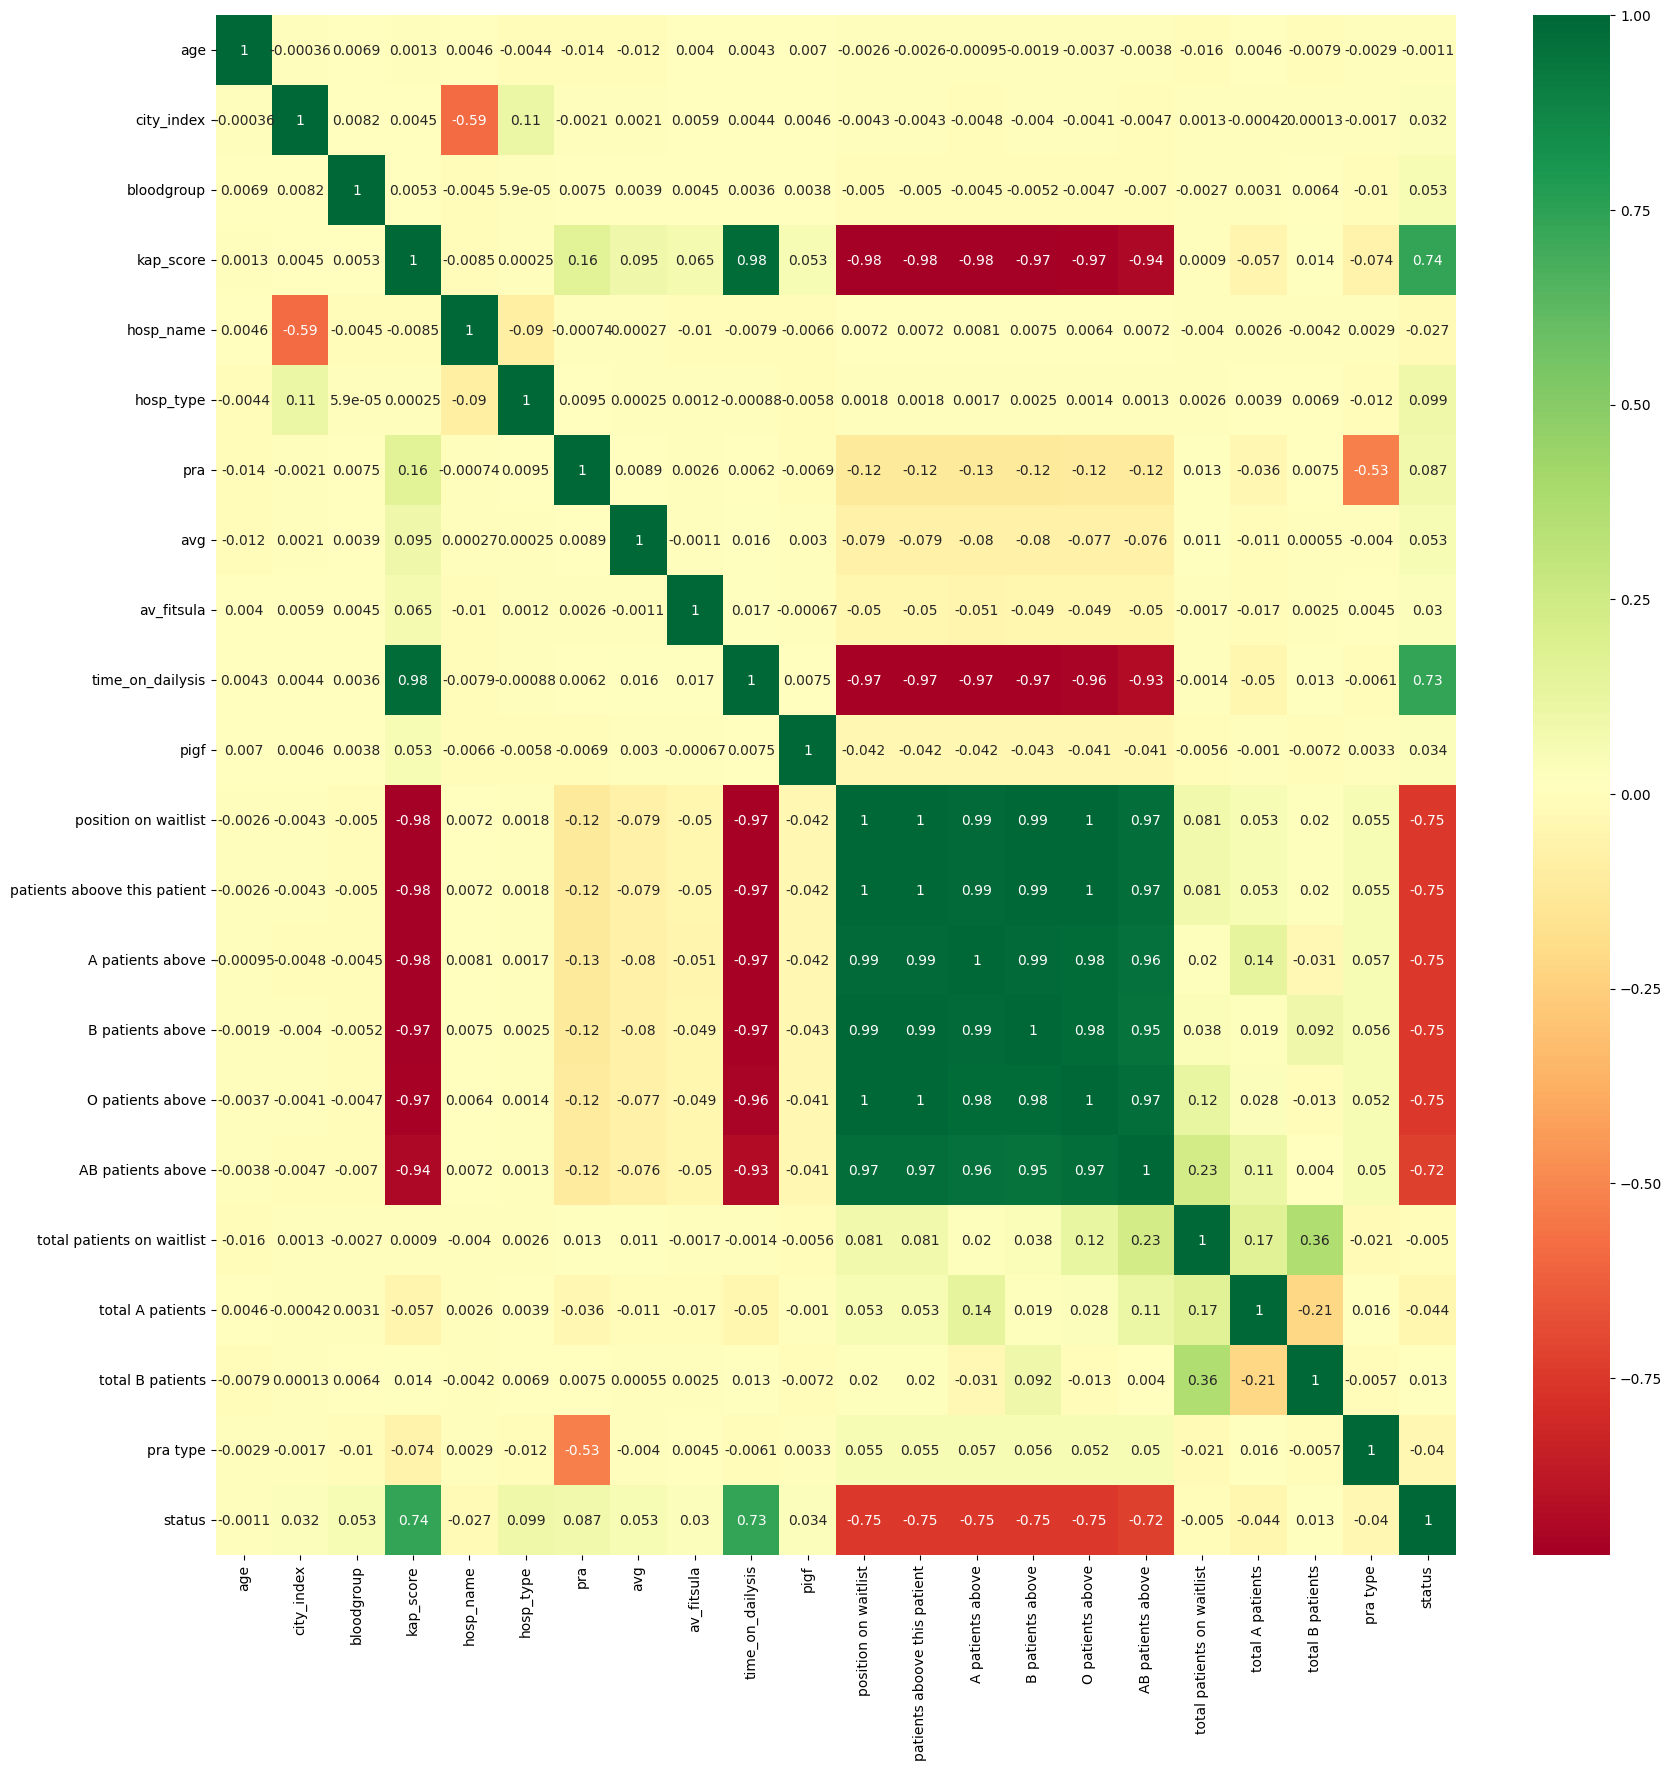

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
df=df.drop(df.iloc[:, 24:29], axis = 1)
df=df.drop(df.iloc[:, 20:22], axis = 1)
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
def featureselection(model):
    X=df.drop(df.iloc[:, 23:29], axis = 1)
    X=df.drop(['age','pra','avg','av_fitsula','time_on_dailysis','pigf','hosp_name'],axis=1)
    #X=df[['bloodgroup', 'city_index', 'kap_score']]
    y=df['status']
    #n=X.size
    clf=Pipeline([('feature selection',SelectFromModel(LinearSVC(penalty="l2"))),('classification',model)])
    global auc_score
    global precision
    global recall
    global f1
    auc_score=[]
    precision=[[],[]]
    recall=[[],[]]
    f1=[[],[]]
    for i in range(1,11):
        #print("Random state:",10*i)
        X_train, X_test, y_train, y_test=preprocessing(X,y,1)
        evaluate_model(X_train,X_test,y_train,y_test,balancing(X_train,X_test,y_train,y_test,clf))

    print(f"{np.around(mean(auc_score),decimals=2)} ({np.around(pstdev(auc_score),decimals=3)})")
    print(f"{np.around(mean(precision[0]),decimals=2)} ({np.around(pstdev(precision[0]),decimals=3)})")
    print(f"{np.around(mean(recall[0]),decimals=2)} ({np.around(pstdev(recall[0]),decimals=3)})")
    print(f"{np.around(mean(f1[0]),decimals=2)} ({np.around(pstdev(f1[0]),decimals=3)})")
    print(f"{np.around(mean(precision[1]),decimals=2)} ({np.around(pstdev(precision[1]),decimals=3)})")
    print(f"{np.around(mean(recall[1]),decimals=2)} ({np.around(pstdev(recall[1]),decimals=3)})")
    print(f"{np.around(mean(f1[1]),decimals=2)} ({np.around(pstdev(f1[1]),decimals=3)})")


In [33]:

print("Gradient Boost:")
featureselection(gbc)

Gradient Boost:
1.0 (0.0)
1.0 (0.0)
1.0 (0.0)
1.0 (0.0)
1.0 (0.0)
1.0 (0.0)
1.0 (0.0)


In [36]:
from sklearn.linear_model import LogisticRegression
def logregfeatureselection():
    #X=df.drop(df.iloc[:, 25:30], axis = 1)
    X=df.drop(df.iloc[:, 23:29], axis = 1)
    y=df['status']
    logreg = LogisticRegression(random_state=1)
    logreg.fit(X,y)
    feature_coef=np.r_[np.array(X.columns).reshape(1,22),logreg.coef_]
    print("Coefficent Estimate")
    for i in range(23):
        print(feature_coef[0][i],'=',feature_coef[1][i])
    
    N = len(X)
    p = len(X.columns) + 1
#     X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
#     X_with_intercept[:, 0] = 1
#     X_with_intercept[:, 1:p] = X.values
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    X_with_intercept=sm.add_constant(X)
    ols = sm.OLS(y.values, X_with_intercept)
    ols_result = ols.fit()
    print(ols_result.summary())
    print("VIF Values")
    for i in range(23):
        print(feature_coef[0][i],'=',variance_inflation_factor(X.values, i))

In [37]:
logregfeatureselection()

Coefficent Estimate
age = 0.02177477120539595
city_index = 0.004571231074584509
bloodgroup = 0.09400932264607867
kap_score = 0.13409261709815348
hosp_name = -0.015453189456256778
hosp_type = 0.05707359606462567
pra = 0.00312698342407827
avg = -0.0004509720670272509
av_fitsula = -0.001487028736454732
time_on_dailysis = 0.13446315565608402
pigf = 0.0009590831537054671
position on waitlist = -0.0030850780550051755
patients aboove this patient = -0.0031457523971840785
A patients above = -0.004522853560119991
B patients above = 0.028378817275732236
O patients above = -0.003919175913355723
AB patients above = -0.023082540199206157
total patients on waitlist = 0.010113617347951095
total A patients = -0.0005648895422695109
total B patients = -0.032188854200192046
pra type = 0.0005753710573861899
status = 0.24433872818925056


/Users/pranav/.pyenv/versions/3.10.5/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


IndexError: index 22 is out of bounds for axis 0 with size 22

In [38]:
X=df.drop(df.iloc[:, 25:30], axis = 1)
X=X.drop(df.iloc[:, 14:24], axis = 1)

X

,age,city_index,bloodgroup,kap_score,hosp_name,hosp_type,pra,avg,av_fitsula,time_on_dailysis,pigf,position on waitlist,patients aboove this patient,A patients above
0,38,5,1,7.5,0,1,28,0,0,7,0,4532,4531,911
1,53,0,1,4.5,19,1,46,0,0,3,0,4669,4668,937
2,54,3,0,15.0,6,1,0,0,0,15,0,3971,3970,800
3,52,18,1,17.0,2,0,0,0,0,17,0,3767,3766,760
4,37,28,2,14.0,1,1,96,0,0,10,0,4080,4079,814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27222,42,2,0,1.0,5,0,0,0,0,1,0,4633,4632,984
27245,47,24,1,1.0,0,1,0,0,0,1,0,4632,4631,980
27251,59,1,0,1.0,5,1,0,0,0,1,0,4627,4626,979
27276,48,15,0,1.0,0,1,0,0,0,1,0,4625,4624,977


In [39]:
np.c_[np.array(X.columns).reshape(1,25),logreg.coef_]

ValueError: cannot reshape array of size 14 into shape (1,25)

In [99]:
def gbcfeatureselection():
    X=df.drop(df.iloc[:, 23:30], axis = 1)
    X=X.drop(X.iloc[:,11:22], axis=1)
    y=df['status']
    # hyperparams={'learning_rate': 0.1, 'n_estimators': 100}
    # gbc=GradientBoostingClassifier(**hyperparams,random_state=1)
    # gbc.fit(X,y)
    # feature_coef=np.r_[np.array(X.columns).reshape(1,12),gbc.coef_]
    # print("Coefficent Estimate")
    # for i in range(12):
    #     print(feature_coef[0][i],'=',feature_coef[1][i])
    
    N = len(X)
    p = len(X.columns) + 1
    X_with_intercept = np.empty(shape=(N, p))
    X_with_intercept[:, 0] = 1
    X_with_intercept[:, 1:p] = X.values
    for i in X.columns:
        print(i)
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    ols = sm.OLS(y.values, X_with_intercept)
    ols_result = ols.fit()
    print(ols_result.summary())
    for i in range(12):
        print(variance_inflation_factor(X.values, i))

In [100]:
gbcfeatureselection()

age
city_index
bloodgroup
kap_score
hosp_name
hosp_type
pra
avg
av_fitsula
time_on_dailysis
pigf
pra type
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.556
Method:                 Least Squares   F-statistic:                     2401.
Date:                Sun, 06 Aug 2023   Prob (F-statistic):               0.00
Time:                        12:34:06   Log-Likelihood:                -817.12
No. Observations:               23017   AIC:                             1660.
Df Residuals:                   23004   BIC:                             1765.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------